# Analyze the green-line broadening mentioned by Meg on 2023-02-25

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import interpolate
from scipy import optimize
import pandas as pd
import seaborn as sns
from scipy.io import readsav
import xarray as xr

plt.style.use('seaborn')

##### Two helper functions for binning/donwsampling data

In [3]:
# el

NameError: name 'el' is not defined

In [4]:
readsav('TRSp_110.sav').keys()

dict_keys(['glattrsp', 'glontrsp', 'mlattrsp', 'mlontrsp', 'elevtrsp'])

In [5]:
d = pd.read_csv('wavelength_per_bin.txt', header=None, skiprows=3, sep='[ \t\n]', engine='python')
lam = d.dropna(axis=1, how='all').values.ravel()[:-2]

scal = readsav('TRSp_110.sav')
el = scal['elevtrsp']
lat = scal['glattrsp']

d = pd.read_csv('TREx_spectrograph_20180410_063045.txt', header=None, skiprows=4, sep='[ \t\n]', engine='python')
d_green = d.stack().values.reshape(256,1024)

d = pd.read_csv('TREx_spectrograph_20180410_064015.txt', header=None, skiprows=4, sep='[ \t\n]', engine='python')
d_purple = d.stack().values.reshape(256,1024)



<IPython.core.display.Javascript object>


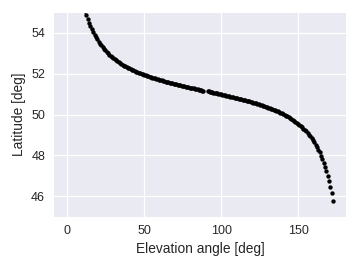

In [6]:
plt.figure(figsize=(4,3))
plt.plot(el,lat,'k.')
plt.xlabel('Elevation angle [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim((45,55))
plt.tight_layout()

In [7]:
# Put into xarray
dsg = xr.DataArray(d_green,  coords={'lam':lam, 'el':el}, dims=('el','lam'))
dsp = xr.DataArray(d_purple, coords={'lam':lam, 'el':el}, dims=('el','lam'))
# Trim to regions with actual el angles
dsg = dsg.where(dsg.el > 0, drop=True)
dsp = dsp.where(dsp.el > 0, drop=True)

<IPython.core.display.Javascript object>


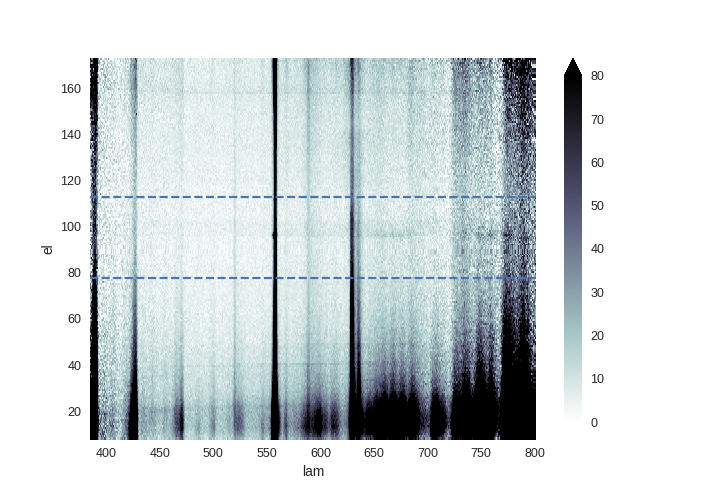

In [8]:
plt.figure()
dsg.plot(cmap='bone_r', vmin=0, vmax=80)
plt.plot(lam,  el[100]*np.ones_like(lam), 'C0--') # This is the region I plotted in other notebook
plt.plot(lam, el[140]*np.ones_like(lam), 'C0--')

<IPython.core.display.Javascript object>


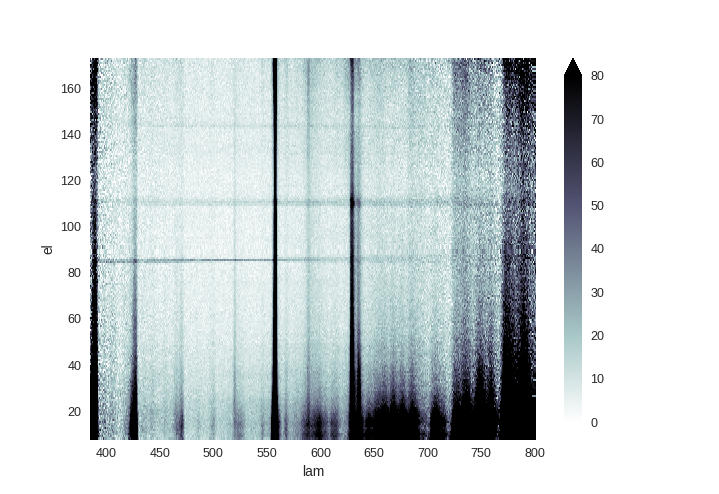

In [9]:
plt.figure()
dsp.plot(cmap='bone_r', vmin=0, vmax=80)

# Zoom in on greenline
And above some elev

In [10]:
dsg2 = dsg.where(abs(dsg.lam - 557.7) < 10, drop=True)
dsg2 = dsg2.where((dsg2.el > 30) & (dsg2.el < 150), drop=True)

<IPython.core.display.Javascript object>


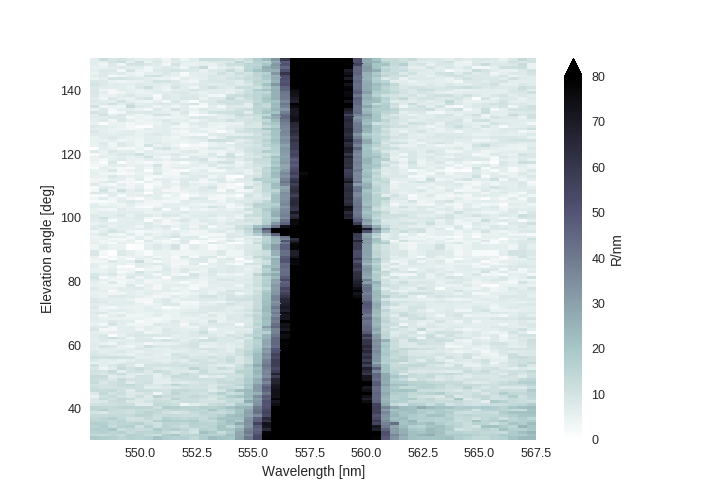

Text(0.5, 0, 'Wavelength [nm]')

In [11]:

plt.figure()
dsg2.plot(cmap='bone_r', vmin=0, vmax=80, cbar_kwargs={'label':'R/nm'})
plt.ylabel('Elevation angle [deg]')
plt.xlabel('Wavelength [nm]')

<IPython.core.display.Javascript object>


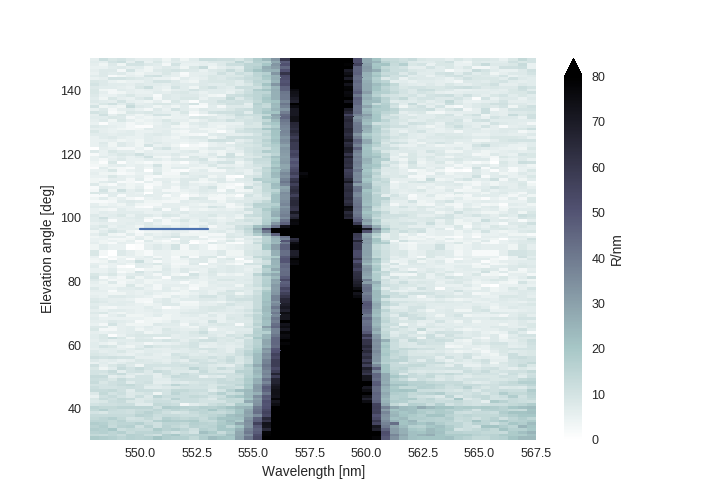

Text(0.5, 0, 'Wavelength [nm]')

In [13]:
# Manually identify the picket fence elevation bin
ig = 61

plt.figure()
dsg2.plot(cmap='bone_r', vmin=0, vmax=80, cbar_kwargs={'label':'R/nm'})
plt.plot([550,553], [dsg2.el.isel(el=ig)]*2, 'C0-')
plt.ylabel('Elevation angle [deg]')
plt.xlabel('Wavelength [nm]')

<IPython.core.display.Javascript object>


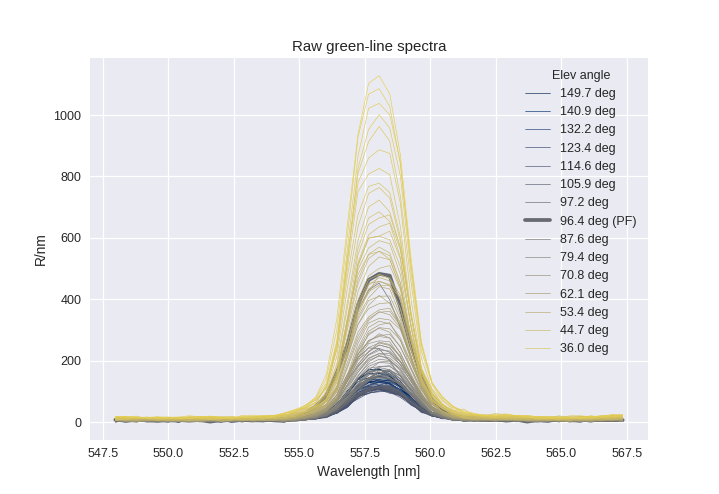

Text(0.5, 1.0, 'Raw green-line spectra')

In [14]:
plt.figure()

colors = plt.cm.cividis(np.linspace(0.0,0.9,len(dsg2.el)))

for n in range(len(dsg2.el)):
    d = dsg2.isel(el=n)
    lab = ''
    lw = 0.5
    if np.mod(n,10)==0:
        lab = '%.1f deg' % (d.el)
    if n == ig: # Manually label picket fence row
        lab = '%.1f deg (PF)' % (d.el)
        lw = 3
    plt.plot(d.lam, d, color=colors[n], lw=lw, label=lab)
plt.legend(title='Elev angle')
plt.ylabel('R/nm')
plt.xlabel('Wavelength [nm]')
plt.title('Raw green-line spectra')

<IPython.core.display.Javascript object>


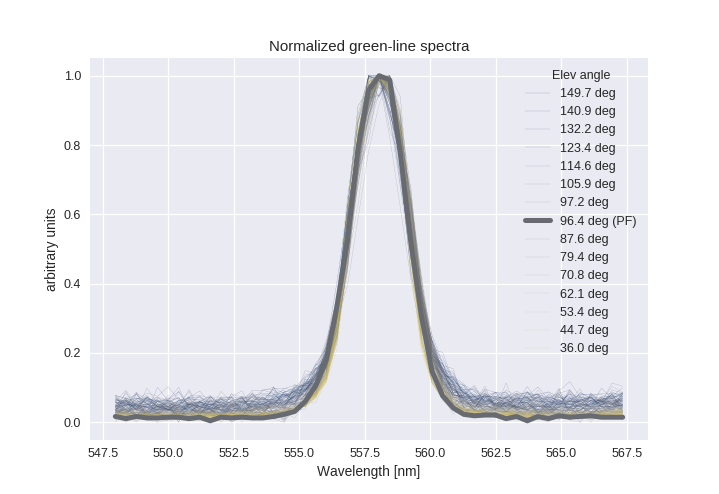

Text(0.5, 1.0, 'Normalized green-line spectra')

In [15]:
plt.figure()

colors = plt.cm.cividis(np.linspace(0.0,0.9,len(dsg2.el)))

for n in range(len(dsg2.el)):
    d = dsg2.isel(el=n)
    lab = ''
    lw = 0.1
    if np.mod(n,10)==0:
        lab = '%.1f deg' % (d.el)
        zorder = 9
    if n == ig: # Manually label picket fence row
        lab = '%.1f deg (PF)' % (d.el)
        lw = 4
        zorder = 10
    d = d / d.max(dim='lam')
    plt.plot(d.lam, d, color=colors[n], lw=lw, label=lab, zorder=zorder)
plt.legend(title='Elev angle')
plt.ylabel('arbitrary units')
plt.xlabel('Wavelength [nm]')
plt.title('Normalized green-line spectra')

In [16]:
# Print stuff for Reza
d = dsg2.isel(el=ig)
d = d / d.max(dim='lam')

In [19]:
d

<xarray.DataArray (lam: 49)>
array([0.016563, 0.010352, 0.016563, 0.012422, 0.012422, 0.014493, 0.014493,
       0.010352, 0.014493, 0.004141, 0.014493, 0.012422, 0.014493, 0.012422,
       0.012422, 0.016563, 0.022774, 0.031056, 0.060041, 0.10559 , 0.180124,
       0.333333, 0.52381 , 0.79089 , 0.958592, 1.      , 0.987578, 0.776398,
       0.519669, 0.306418, 0.146998, 0.076605, 0.041408, 0.022774, 0.018634,
       0.020704, 0.020704, 0.010352, 0.016563, 0.004141, 0.016563, 0.010352,
       0.018634, 0.014493, 0.016563, 0.018634, 0.014493, 0.014493, 0.014493])
Coordinates:
  * lam      (lam) float64 548.0 548.4 548.8 549.2 ... 566.1 566.5 566.9 567.3
    el       >f4 96.3752

In [20]:
d.to_netcdf('/home/bharding/public_html/tmp/greenline_for_reza.nc')